In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from itertools import product
from collections import Counter
from sklearn.cluster import KMeans
import category_encoders as ce
import warnings

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 160)
pd.set_option('display.max_colwidth', 40)
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")
test=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")

In [3]:
categories=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")
pd.DataFrame(categories.item_category_name.values.reshape(-1,4))

,0,1,2,3
0,PC - Гарнитуры/Наушники,Аксессуары - PS2,Аксессуары - PS3,Аксессуары - PS4
1,Аксессуары - PSP,Аксессуары - PSVita,Аксессуары - XBOX 360,Аксессуары - XBOX ONE
2,Билеты (Цифра),Доставка товара,Игровые консоли - PS2,Игровые консоли - PS3
3,Игровые консоли - PS4,Игровые консоли - PSP,Игровые консоли - PSVita,Игровые консоли - XBOX 360
4,Игровые консоли - XBOX ONE,Игровые консоли - Прочие,Игры - PS2,Игры - PS3
5,Игры - PS4,Игры - PSP,Игры - PSVita,Игры - XBOX 360
6,Игры - XBOX ONE,Игры - Аксессуары для игр,Игры Android - Цифра,Игры MAC - Цифра
7,Игры PC - Дополнительные издания,Игры PC - Коллекционные издания,Игры PC - Стандартные издания,Игры PC - Цифра
8,"Карты оплаты (Кино, Музыка, Игры)",Карты оплаты - Live!,Карты оплаты - Live! (Цифра),Карты оплаты - PSN
9,Карты оплаты - Windows (Цифра),Кино - Blu-Ray,Кино - Blu-Ray 3D,Кино - Blu-Ray 4K


In [4]:
categories['group']=categories['item_category_name'].str.split('-')
categories['group']=categories['group'].apply(lambda x: x[0].strip())
categories.group

0                                    PC
1                            Аксессуары
2                            Аксессуары
3                            Аксессуары
4                            Аксессуары
5                            Аксессуары
6                            Аксессуары
7                            Аксессуары
8                        Билеты (Цифра)
9                       Доставка товара
10                      Игровые консоли
11                      Игровые консоли
12                      Игровые консоли
13                      Игровые консоли
14                      Игровые консоли
15                      Игровые консоли
16                      Игровые консоли
17                      Игровые консоли
18                                 Игры
19                                 Игры
20                                 Игры
21                                 Игры
22                                 Игры
23                                 Игры
24                                 Игры


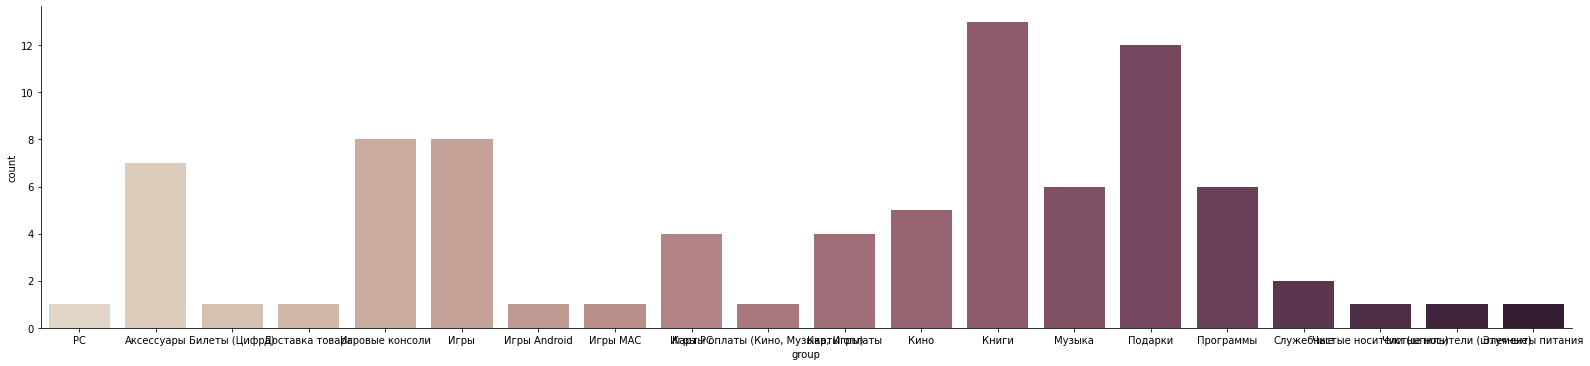

In [5]:
import seaborn as sns

sns.catplot(x='group', kind='count', palette="ch:.25", data=categories, aspect=4.4)

In [6]:
from sklearn.preprocessing import LabelEncoder 

lbl = LabelEncoder() 
lbl.fit(list(categories.group.values)) 
categories['group_id'] = lbl.transform(list(categories.group.values))

In [7]:
items=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) ...,0,40
1,!ABBYY FineReader 12 Professional Ed...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) ...,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) ...,3,40
4,***КОРОБКА (СТЕКЛО) ...,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифро...,22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD)...,22167,49
22168,Яйцо для Little Inu,22168,62


In [8]:
items['item_name'] = items['item_name'].str.lower()
items['item_name'] = items['item_name'].str.replace('.', '')
for i in [r'[^\w\d\s\.]', r'\bthe\b', r'\bin\b', r'\bis\b',
          r'\bfor\b', r'\bof\b', r'\bon\b', r'\band\b',  
          r'\bto\b', r'\bwith\b' , r'\byo\b']:
    items['item_name'] = items['item_name'].str.replace(i, ' ')
items['item_name'] = items['item_name'].str.replace(r'\b.\b', ' ')

#extract first n characters of name
items['item_name_no_space'] = items['item_name'].str.replace(' ', '')
items['item_name_first4'] = [x[:4] for x in items['item_name_no_space']]
items['item_name_first6'] = [x[:6] for x in items['item_name_no_space']]
items['item_name_first11'] = [x[:11] for x in items['item_name_no_space']]
del items['item_name_no_space']


In [9]:
le=LabelEncoder()
items.item_name_first4=le.fit_transform(items.item_name_first4.values)
items.item_name_first6 = le.fit_transform(items.item_name_first6.values)
items.item_name_first11 = le.fit_transform(items.item_name_first11.values)

#join category_name, group_name and group_id to items
items = items.join(categories.set_index('item_category_id'), on='item_category_id')
items.sample(10)

,item_name,item_id,item_category_id,item_name_first4,item_name_first6,item_name_first11,item_category_name,group,group_id
9062,будь круче bd,9062,37,1500,2232,3972,Кино - Blu-Ray,Кино,11
631,1с образовательная коллекция полезны...,631,77,45,54,72,Программы - Обучающие,Программы,15
11178,домашнее видео,11178,40,1906,2905,5017,Кино - DVD,Кино,11
8407,атлантис регион,8407,40,1334,1983,3526,Кино - DVD,Кино,11
16696,отряд особого назначения регион,16696,40,2811,4353,7636,Кино - DVD,Кино,11
13029,кузьмин владимир динамик динамик ...,13029,58,2299,3564,6315,Музыка - Винил,Музыка,13
8593,бакуган новая вестроя выпуск,8593,40,1352,2008,3565,Кино - DVD,Кино,11
16286,немыльные пузыри,16286,69,2652,4121,7255,Подарки - Сувениры,Подарки,14
4551,manson marilyn born villain,4551,55,695,1009,1769,Музыка - CD локального производства,Музыка,13
3225,euro truck simulator грузом по ...,3225,28,417,600,1068,Игры PC - Дополнительные издания,Игры PC,8


In [10]:
train.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
323773,31.03.2013,2,25,1472,2599.0,1.0
156510,09.02.2013,1,24,11029,1599.0,1.0
2893055,20.10.2015,33,38,15594,249.0,1.0
929095,05.09.2013,8,54,7097,1799.0,1.0
408968,17.04.2013,3,54,17191,199.0,1.0
55273,12.01.2013,0,7,7218,1599.0,1.0
1264979,29.12.2013,11,46,20311,299.0,1.0
24371,05.01.2013,0,26,18721,149.0,1.0
199767,09.02.2013,1,37,4163,1590.0,1.0
74500,01.01.2013,0,54,21771,449.5,1.0


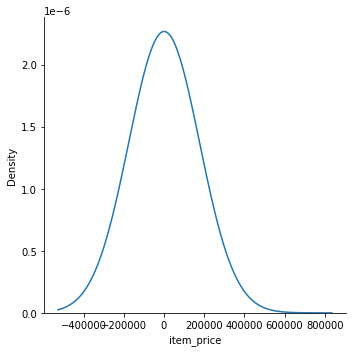

In [11]:
sns.displot(x='item_price', kind='kde',data=train ,bw_adjust=2000)

In [12]:
train=train[train['item_price']>0] 
train=train[train['item_price']<500000]

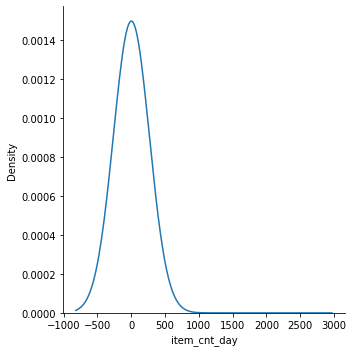

In [13]:
sns.displot(x='item_cnt_day', kind='kde',data=train ,bw_adjust=2000)

In [14]:
train=train[train['item_cnt_day']>0]
train=train[train['item_cnt_day']<1000]

In [15]:
#Handling Duplicate Data

train.loc[train['shop_id'] == 0, 'shop_id'] = 57
train.loc[train['shop_id'] == 1, 'shop_id'] = 58
train.loc[train['shop_id'] == 10, 'shop_id'] = 11
train.loc[train['shop_id'] == 39, 'shop_id'] = 40

test.loc[test['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 39, 'shop_id'] = 40

In [16]:
train=train[train['shop_id'].isin(test.shop_id.unique())]
train['date']=pd.to_datetime(train['date'],format='%d.%m.%Y')
train['weekday']=train.date.dt.dayofweek

train['revenue']=train['item_price']*train['item_cnt_day']

In [17]:
train['first_day_of_sale']=train.date.dt.dayofyear
train['first_day_of_sale']+=365*(train.date.dt.year-2013)
train['first_day_of_sale']=train.groupby('item_id')['first_day_of_sale'].transform('min').astype('int16')

In [18]:
qual=train.groupby(['shop_id','weekday']).agg({'item_cnt_day':'sum'}).reset_index()
qual=pd.merge(qual,train.groupby(['shop_id']).agg({'item_cnt_day':'sum'}).reset_index(),on='shop_id', how='left')
qual.columns=['shop_id','weekday','shop_day_sales','shop_total_sales']
qual['day_qual']=qual['shop_day_sales']/qual['shop_total_sales']
qual=qual[['shop_id','weekday','day_qual']]

qual.sample(5)

,shop_id,weekday,day_qual
203,45,0,0.109307
13,3,6,0.187182
153,35,6,0.185610
183,41,1,0.114896
163,37,2,0.122280


In [19]:
dates=pd.DataFrame(data={'date':pd.date_range(start='2013-01-01',end='2015-11-30')})
dates['year']=dates.date.dt.year-2013
dates['month']=dates.date.dt.month
dates['weekday']=dates.date.dt.weekday
dates['date_block_num']=dates['year']*12+dates['month']-1
dates['first_day_of_month']=dates.date.dt.dayofyear
dates['first_day_of_month']+=365*dates['year']

dates=dates.join(qual.set_index('weekday'), on='weekday')
dates=dates.groupby(['date_block_num','shop_id','month','year']).agg({'day_qual':'sum','first_day_of_month':'min'}).reset_index()
dates.query('shop_id==26').head(15)

,date_block_num,shop_id,month,year,day_qual,first_day_of_month
17,0,26,1,0,4.399888,1
59,1,26,2,0,4.000000,32
101,2,26,3,0,4.484770,60
143,3,26,4,0,4.251749,91
185,4,26,5,0,4.427114,121
227,5,26,6,0,4.321137,152
269,6,26,7,0,4.379822,182
311,7,26,8,0,4.473700,213
353,8,26,9,0,4.261819,244
395,9,26,10,0,4.399888,274


In [20]:
train=train.groupby(['shop_id','date_block_num','item_id']).agg({'item_cnt_day':'sum','revenue':'sum','first_day_of_sale':'first'}).reset_index().rename(columns={'item_cnt_day':'item_cnt'})
train.sample(5)


,shop_id,date_block_num,item_id,item_cnt,revenue,first_day_of_sale
1115025,52,33,21671,1.0,399.0,985
915154,44,7,5591,1.0,1790.0,1
1204943,57,1,7066,1.0,578.0,2
920861,44,13,558,1.0,149.0,112
232309,15,11,15342,1.0,199.0,278


In [21]:
df=[]
for i in train['date_block_num'].unique():
    cur_shop=train.loc[train['date_block_num']==i,'shop_id'].unique()
    cur_item=train.loc[train['date_block_num']==i,'item_id'].unique()
    df.append(np.array(list(product([i],cur_shop,cur_item))))

base_features=['date_block_num','shop_id','item_id']
df=pd.DataFrame(np.vstack(df),columns=base_features)
df.tail(5)

,date_block_num,shop_id,item_id
8642833,33,59,5662
8642834,33,59,10068
8642835,33,59,12839
8642836,33,59,18275
8642837,33,59,20392


In [22]:
test['date_block_num']=34
del test['ID']

In [23]:
df=pd.concat([df,test]).fillna(0).reset_index()


In [24]:
df.head(5)

,index,date_block_num,shop_id,item_id
0,0,0,2,27
1,1,0,2,33
2,2,0,2,317
3,3,0,2,438
4,4,0,2,471


In [25]:
del df['index']

In [26]:
df.count()

date_block_num    8857038
shop_id           8857038
item_id           8857038
dtype: int64

In [27]:
df=pd.merge(df,train,on=['date_block_num','shop_id','item_id'],how='left').fillna(0)
df=pd.merge(df,items.drop(columns=['item_name','item_category_name','group']),on='item_id',how='left')
df=pd.merge(df,dates,on=['date_block_num','shop_id'],how='left')

df.head(5)

,date_block_num,shop_id,item_id,item_cnt,revenue,first_day_of_sale,item_category_id,item_name_first4,item_name_first6,item_name_first11,group_id,month,year,day_qual,first_day_of_month
0,0,2,27,1.0,2499.0,2.0,19,1,1,1,5,1,0,4.381749,1
1,0,2,33,1.0,499.0,2.0,37,187,249,414,11,1,0,4.381749,1
2,0,2,317,1.0,299.0,4.0,45,33,38,52,12,1,0,4.381749,1
3,0,2,438,1.0,299.0,19.0,45,33,38,54,12,1,0,4.381749,1
4,0,2,471,2.0,798.0,3.0,49,35,43,59,12,1,0,4.381749,1


In [28]:
shops=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [29]:
from sklearn.cluster import KMeans

shops_cats=pd.DataFrame(np.array(list(product(*[df['shop_id'].unique(), df['item_category_id'].unique()]))),
    columns =['shop_id', 'item_category_id'])
temp=df.groupby(['shop_id', 'item_category_id']).agg({'item_cnt':'sum'}).reset_index()
temp1=temp.groupby('shop_id').agg({'item_cnt':'sum'}).rename(columns={'item_cnt':'shop_total'})
temp = temp.join(temp1, on='shop_id')
temp['item_agg']=temp['item_cnt']/temp['shop_total']
temp=temp[['shop_id','item_category_id','item_agg']]

shops_cats=pd.merge(shops_cats,temp,on=['shop_id','item_category_id'],how='left').fillna(0)
kmeans = KMeans(n_clusters=7, random_state=0).fit(shops_cats)
shops_cats['shop_cluster'] = kmeans.labels_.astype('int8')

#adding these clusters to the shops dataframe
shops = shops.join(shops_cats['shop_cluster'], on='shop_id')


In [30]:
shops.dropna(inplace=True)
shops['shop_name']=shops['shop_name'].str.lower()
shops['city']=shops['shop_name'].apply(lambda x:x.split()[0])
shops['city']=le.fit_transform(shops['city'])
shops.head(5)

,shop_name,shop_id,shop_cluster,city
0,"!якутск орджоникидзе, 56 фран",0,3,0
1,"!якутск тц ""центральный"" фран",1,6,0
2,"адыгея тц ""мега""",2,6,1
3,"балашиха трк ""октябрь-киномир""",3,6,2
4,"волжский тц ""волга молл""",4,0,3


In [31]:
df=pd.merge(df,shops.drop(columns='shop_name'), on='shop_id', how='left')
df.head(5)

,date_block_num,shop_id,item_id,item_cnt,revenue,first_day_of_sale,item_category_id,item_name_first4,item_name_first6,item_name_first11,group_id,month,year,day_qual,first_day_of_month,shop_cluster,city
0,0,2,27,1.0,2499.0,2.0,19,1,1,1,5,1,0,4.381749,1,6,1
1,0,2,33,1.0,499.0,2.0,37,187,249,414,11,1,0,4.381749,1,6,1
2,0,2,317,1.0,299.0,4.0,45,33,38,52,12,1,0,4.381749,1,6,1
3,0,2,438,1.0,299.0,19.0,45,33,38,54,12,1,0,4.381749,1,6,1
4,0,2,471,2.0,798.0,3.0,49,35,43,59,12,1,0,4.381749,1,6,1


In [32]:
df.item_cnt.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          1.0
1          1.0
2          1.0
3          1.0
4          2.0
          ... 
8857033    0.0
8857034    0.0
8857035    0.0
8857036    0.0
8857037    0.0
Name: item_cnt, Length: 8857038, dtype: float64>

In [33]:
del train, categories, shops, shops_cats, temp, temp1, 
df.head()

,date_block_num,shop_id,item_id,item_cnt,revenue,first_day_of_sale,item_category_id,item_name_first4,item_name_first6,item_name_first11,group_id,month,year,day_qual,first_day_of_month,shop_cluster,city
0,0,2,27,1.0,2499.0,2.0,19,1,1,1,5,1,0,4.381749,1,6,1
1,0,2,33,1.0,499.0,2.0,37,187,249,414,11,1,0,4.381749,1,6,1
2,0,2,317,1.0,299.0,4.0,45,33,38,52,12,1,0,4.381749,1,6,1
3,0,2,438,1.0,299.0,19.0,45,33,38,54,12,1,0,4.381749,1,6,1
4,0,2,471,2.0,798.0,3.0,49,35,43,59,12,1,0,4.381749,1,6,1


In [34]:
df['item_cnt_unclipped'] = df['item_cnt']
df['item_cnt'] = df['item_cnt'].clip(0, 20)

In [35]:
def downcast(df):
    float_cols = [c for c in df if df[c].dtype in ["float64"]]
    int_cols=[c for c in df if df[c].dtype in ['int64']]
    df[float_cols] = df[float_cols].astype('float32')
    df[int_cols] = df[int_cols].astype('int16')
    return df
df = downcast(df)



In [36]:
df['item_age']=(df['date_block_num']-df.groupby('item_id')['date_block_num'].transform('min')).astype('int8')
df['item_name_first4_age'] = (df['date_block_num'] - df.groupby('item_name_first4')['date_block_num'].transform('min')).astype('int8')
df['item_name_first6_age'] = (df['date_block_num'] - df.groupby('item_name_first6')['date_block_num'].transform('min')).astype('int8')
df['item_name_first11_age'] = (df['date_block_num'] - df.groupby('item_name_first11')['date_block_num'].transform('min')).astype('int8')
df['category_age'] = (df['date_block_num'] - df.groupby('item_category_id')['date_block_num'].transform('min')).astype('int8')
df['group_age'] = (df['date_block_num'] - df.groupby('group_id')['date_block_num'].transform('min')).astype('int8')
df['shop_age'] = (df['date_block_num'] - df.groupby('shop_id')['date_block_num'].transform('min')).astype('int8')

In [37]:
temp=df.query('item_cnt>0').groupby(['item_id','shop_id']).agg({'date_block_num':'min'}).reset_index()
temp.columns=['item_id','shop_id','item_shop_first_sale']
df = pd.merge(df, temp, on=['item_id','shop_id'], how='left')
#item age that stays at 0 if a shop hasn't sold the item
df['item_age_if_shop_sale'] = (df['date_block_num'] > df['item_shop_first_sale']) * df['item_age']
#the length of time an item has been for sale without being sold at individual shops
df['item_age_without_shop_sale'] = (df['date_block_num'] <= df['item_shop_first_sale']) * df['item_age']
del df['item_shop_first_sale']

In [38]:
def agg_cnt_col(df, merging_cols, new_col,aggregation):
    temp = df.groupby(merging_cols).agg(aggregation).reset_index()
    temp.columns = merging_cols + [new_col]
    df = pd.merge(df, temp, on=merging_cols, how='left')
    return df

In [39]:
df = agg_cnt_col(df, ['date_block_num','item_id'],'item_cnt_all_shops',{'item_cnt':'mean'})
df = agg_cnt_col(df, ['date_block_num','item_category_id','shop_id'],'item_cnt_all_shops_median',{'item_cnt':'median'}) 
#all items in category at individual shops
df = agg_cnt_col(df, ['date_block_num','item_category_id','shop_id'],'category_cnt',{'item_cnt':'mean'})
df = agg_cnt_col(df, ['date_block_num','item_category_id','shop_id'],'category_cnt_median',{'item_cnt':'median'}) 
#all items in category across all shops
df = agg_cnt_col(df, ['date_block_num','item_category_id'],'category_cnt_all_shops',{'item_cnt':'mean'})
df = agg_cnt_col(df, ['date_block_num','item_category_id'],'category_cnt_all_shops_median',{'item_cnt':'median'})
#all items in group
df = agg_cnt_col(df, ['date_block_num','group_id','shop_id'],'group_cnt',{'item_cnt':'mean'})

df = agg_cnt_col(df, ['date_block_num','group_id'],'group_cnt_all_shops',{'item_cnt':'mean'})

df = agg_cnt_col(df, ['date_block_num','shop_id'],'shop_cnt',{'item_cnt':'mean'})

df = agg_cnt_col(df, ['date_block_num','city'],'city_cnt',{'item_cnt':'mean'})


In [40]:
def new_items_sale(df,merging_col,new_col):
    temp=df.query('item_age==0').groupby(merging_col)['item_cnt'].mean().reset_index().rename(columns={'item_cnt': new_col})
    
    df=pd.merge(df,temp,on=merging_col, how='left')
    return df

#mean units sold of new item in category at individual shop
df = new_items_sale(df, ['date_block_num','item_category_id','shop_id'], 'new_items_in_cat')
#mean units sold of new item in category across all shops
df = new_items_sale(df, ['date_block_num','item_category_id'], 'new_items_in_cat_all_shops')

In [41]:
def agg_price_col(df, merging_cols, new_col):
    temp = df.groupby(merging_cols).agg({'revenue':'sum','item_cnt_unclipped':'sum'}).reset_index()
    temp[new_col] = temp['revenue']/temp['item_cnt_unclipped']
    temp = temp[merging_cols + [new_col]]
    df = pd.merge(df, temp, on=merging_cols, how='left')
    return df

#average item price
df = agg_price_col(df,['date_block_num','item_id'],'item_price')
#average price of items in category
df = agg_price_col(df,['date_block_num','item_category_id'],'category_price')
#average price of all items
df = agg_price_col(df,['date_block_num'],'block_price')

In [42]:
df = downcast(df)

**LAG FEATURES -'I have no idea how?'**

In [43]:
def lag_feature(df, lag, col, merge_cols):        
    temp = df[merge_cols + [col]]
    temp = temp.groupby(merge_cols).agg({f'{col}':'first'}).reset_index()
    temp.columns = merge_cols + [f'{col}_lag{lag}']
    temp['date_block_num'] += lag
    df = pd.merge(df, temp, on=merge_cols, how='left')
    df[f'{col}_lag{lag}'] = df[f'{col}_lag{lag}'].fillna(0).astype('float32')
    return df

In [44]:
lag12_cols = {
    'item_cnt':['date_block_num', 'shop_id', 'item_id'],
    'item_cnt_all_shops':['date_block_num', 'item_id'],
    'category_cnt':['date_block_num', 'shop_id', 'item_category_id'],
    'category_cnt_all_shops':['date_block_num', 'item_category_id'],
    'group_cnt':['date_block_num', 'shop_id', 'group_id'],
    'group_cnt_all_shops':['date_block_num', 'group_id'],
    'shop_cnt':['date_block_num', 'shop_id'],
    'city_cnt':['date_block_num', 'city'],
    'new_items_in_cat':['date_block_num', 'shop_id', 'item_category_id'],
    'new_items_in_cat_all_shops':['date_block_num', 'item_category_id']
}
for col,merge_cols in lag12_cols.items():
    df[f'{col}_lag1to12'] = 0
    for i in range(1,13):
        df = lag_feature(df, i, col, merge_cols)
        df[f'{col}_lag1to12'] += df[f'{col}_lag{i}']
        if i > 2:
            del df[f'{col}_lag{i}']
    if col == 'item_cnt':
        del df[f'{col}_lag1']
        del df[f'{col}_lag2']        
    else:
        del df[col]

In [45]:
lag2_cols = {
    'item_cnt_unclipped':['date_block_num', 'shop_id', 'item_id'],
    'item_cnt_all_shops_median':['date_block_num', 'item_id'],
    'category_cnt_median':['date_block_num', 'shop_id', 'item_category_id'],
    'category_cnt_all_shops_median':['date_block_num', 'item_category_id']
}
for col in lag2_cols:
    df = lag_feature(df, 1, col, merge_cols) 
    df = lag_feature(df, 2, col, merge_cols)
    if col!='item_cnt_unclipped':
        del df[col]

In [46]:
df['item_cnt_diff'] = df['item_cnt_unclipped_lag1']/df['item_cnt_lag1to12']
df['item_cnt_all_shops_diff'] = df['item_cnt_all_shops_lag1']/df['item_cnt_all_shops_lag1to12']
df['category_cnt_diff'] = df['category_cnt_lag1']/df['category_cnt_lag1to12']
df['category_cnt_all_shops_diff'] = df['category_cnt_all_shops_lag1']/df['category_cnt_all_shops_lag1to12']

In [47]:
df = lag_feature(df, 1, 'category_price',['date_block_num', 'item_category_id'])
df = lag_feature(df, 1, 'block_price',['date_block_num'])
del df['category_price'], df['block_price']

In [48]:
df.loc[(df['item_age']>0) & (df['item_cnt_lag1to12'].isna()), 'item_cnt_lag1to12'] = 0
df.loc[(df['category_age']>0) & (df['category_cnt_lag1to12'].isna()), 'category_cnt_lag1to12'] = 0
df.loc[(df['group_age']>0) & (df['group_cnt_lag1to12'].isna()), 'group_cnt_lag1to12'] = 0

In [49]:
df['item_cnt_lag1to12'] /= [min(idx) for idx in zip(df['item_age'],df['shop_age'],[12]*len(df))]
df['item_cnt_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['item_age'],[12]*len(df))]
df['category_cnt_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],df['shop_age'],[12]*len(df))]
df['category_cnt_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],[12]*len(df))]
df['group_cnt_lag1to12'] /= [min(idx) for idx in zip(df['group_age'],df['shop_age'],[12]*len(df))]
df['group_cnt_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['group_age'],[12]*len(df))]
df['city_cnt_lag1to12'] /= [min(idx) for idx in zip(df['date_block_num'],[12]*len(df))]
df['shop_cnt_lag1to12'] /= [min(idx) for idx in zip(df['shop_age'],[12]*len(df))]
df['new_items_in_cat_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],df['shop_age'],[12]*len(df))]
df['new_items_in_cat_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],[12]*len(df))]

In [50]:
df = downcast(df)

In [51]:
def past_information(df, merging_cols, new_col, aggregation):
    temp = []
    for i in range(1,35):
        block = df.query(f'date_block_num < {i}').groupby(merging_cols).agg(aggregation).reset_index()
        block.columns = merging_cols + [new_col]
        block['date_block_num'] = i
        block = block[block[new_col]>0]
        temp.append(block)
    temp = pd.concat(temp)
    df = pd.merge(df, temp, on=['date_block_num']+merging_cols, how='left')
    return df

#average item price in latest block item was sold
df = past_information(df, ['item_id'],'last_item_price',{'item_price':'last'})
#total units of item sold at individual shop
df = past_information(df, ['shop_id','item_id'],'item_cnt_sum_alltime',{'item_cnt':'sum'})
#total units of item sold at all shops
df = past_information(df, ['item_id'],'item_cnt_sum_alltime_allshops',{'item_cnt':'sum'})

#these columns are no longer needed, and would cause data leakage if retained
del df['revenue'], df['item_cnt_unclipped'], df['item_price']

In [52]:
df['relative_price_item_block_lag1'] = df['last_item_price']/df['block_price_lag1']

In [53]:
import gc
gc.collect()
df = downcast(df)

In [54]:
def matching_name_cat_age(df,n,all_shops):
    temp_cols = [f'same_name{n}catage_cnt','date_block_num', f'item_name_first{n}','item_age','item_category_id']
    if all_shops:
        temp_cols[0] += '_all_shops'
    else:
        temp_cols += ['shop_id']
    temp = []
    for i in range(1,35):
        block = (
            df
            .query(f'date_block_num < {i}')
            .groupby(temp_cols[2:])
            .agg({'item_cnt':'mean'})
            .reset_index()
            .rename(columns={'item_cnt':temp_cols[0]})
        )
        block = block[block[temp_cols[0]]>0]
        block['date_block_num'] = i
        temp.append(block)
    temp = pd.concat(temp)
    df = pd.merge(df, temp, on=temp_cols[1:], how='left')
    return df

In [55]:
for n in [4,6,11]:
    for all_shops in [True,False]:
        df = matching_name_cat_age(df,n,all_shops)

In [56]:
df = downcast(df)
int8_cols = [
    'item_cnt','month','group_id',
    'city','shop_id','date_block_num','item_category_id',
    'item_age',
]

int16_cols = [
    'item_id','item_name_first4',
    'item_name_first6','item_name_first11'
]
for col in int8_cols:
    df[col] = df[col].astype('int8')
for col in int16_cols:
    df[col] = df[col].astype('int16')

In [57]:
def nearby_item_data(df,col):
    if col in ['item_cnt_unclipped_lag1','item_cnt_lag1to12']:
        cols = ['date_block_num', 'shop_id', 'item_id']
        temp = df[cols + [col]] 
    else:
        cols = ['date_block_num', 'item_id']
        temp = df.groupby(cols).agg({col:'first'}).reset_index()[cols + [col]]   
    
    temp.columns = cols + [f'below_{col}']
    temp['item_id'] += 1
    df = pd.merge(df, temp, on=cols, how='left')
    
    temp.columns = cols + [f'above_{col}']
    temp['item_id'] -= 2
    df = pd.merge(df, temp, on=cols, how='left')
    
    return df

item_cols = ['item_cnt_unclipped_lag1','item_cnt_lag1to12',
             'item_cnt_all_shops_lag1','item_cnt_all_shops_lag1to12']
for col in item_cols:
    df = nearby_item_data(df,col)
    
del temp

In [58]:
results = Counter()
items['item_name'].str.split().apply(results.update)

words = []
cnts = []
for key, value in results.items():
    words.append(key)
    cnts.append(value)
    
counts = pd.DataFrame({'word':words,'count':cnts})
common_words = counts.query('count>200').word.to_list()
for word in common_words:
    items[f'{word}_in_name'] = items['item_name'].str.contains(word).astype('int8')
drop_cols = [
    'item_id','item_category_id','item_name','item_name_first4',
    'item_name_first6','item_name_first11','group','group_id'
]
items = items.drop(columns=drop_cols)

In [59]:
df = df.join(items, on='item_id')

In [60]:
def binary_encode(df, letters, cols):
    encoder = ce.BinaryEncoder(cols=[f'item_name_first{letters}'], return_df=True)
    temp = encoder.fit_transform(df[f'item_name_first{letters}'])
    df = pd.concat([df,temp], axis=1)
    del df[f'item_name_first{letters}_0']
    name_cols = [f'item_name_first{letters}_{x}' for x in range(1,cols)]
    df[name_cols] = df[name_cols].astype('int8')
    return df

df = binary_encode(df, 11, 15)
    
del df['item_name_first4'], df['item_name_first6']

In [61]:
df.to_pickle('df_complete.pkl')

In [62]:
%reset -f

In [63]:
import pandas as pd
import lightgbm as lgb
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [64]:
df=pd.read_pickle('./df_complete.pkl')
del df['item_category_name']

x_train=df[~df['date_block_num'].isin([0,1,33,34])]
y_train=x_train['item_cnt']
del x_train['item_cnt']

x_val=df[df['date_block_num']==33]
y_val=x_val['item_cnt']
del x_val['item_cnt']

x_test=df[df['date_block_num']==34].drop(columns='item_cnt').reset_index()
del x_test['index']

del df

In [65]:
def build_lgb_model(params,x_train,y_train,x_val,y_val,cat_features):
    lgb_train=lgb.Dataset(x_train,y_train)
    lgb_val=lgb.Dataset(x_val,y_val)
    
    model=lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train,lgb_val), verbose_eval=50, categorical_feature=cat_features)
    return model

In [66]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 1023,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'seed': 1
}
cat_features=['item_category_id','shop_id','month','item_id','city']
lgb_model=build_lgb_model(params,x_train,y_train,x_val,y_val,cat_features)
lgb_model.save_model('initial_lgb_model.txt')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 9.783776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29559
[LightGBM] [Info] Number of data points in the train set: 7876992, number of used features: 149
[LightGBM] [Info] Start training from score 0.310160
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.897946	valid_1's rmse: 0.833111
[100]	training's rmse: 0.707859	valid_1's rmse: 0.710896
[150]	training's rmse: 0.603499	valid_1's rmse: 0.659134
[200]	training's rmse: 0.542632	valid_1's rmse: 0.634736
[250]	training's rmse: 0.503549	valid_1's rmse: 0.624156
[300]	training's rmse: 0.478102	valid_1's rmse: 0.619438
[350]	training's rmse: 0.459154	valid_1's rmse: 0.617231
[400]	training's rmse: 0.444354	valid_1's rmse: 0.616131
Early stopping, best iteration is:
[418]	training's rmse: 0.439646	valid_1's rmse: 0.615588


In [67]:
submission = pd.read_csv('../input/competitive-data-science-predict-future-sales/sample_submission.csv')
submission['item_cnt_month'] = lgb_model.predict(x_test).clip(0,20)
submission[['ID', 'item_cnt_month']].to_csv('initial_lgb_submission.csv', index=False)